# Lab 4: Neural networks 

In this lab we will build dense neural networks on the MNIST dataset.

Make sure you read the tutorial for this lab first.

## Load the data and create train-test splits

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import openml as oml
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

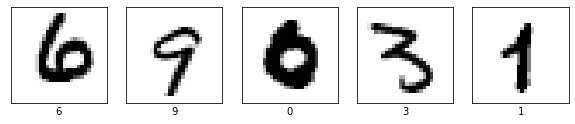

In [2]:
# Download MNIST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [3]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Exercise 1: Preprocessing
* Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. 
* Create a train-test split using the first 60000 examples for training
* Flatten the data
* Convert the data (numpy arrays) to PyTorch tensors
* Create a TensorDataset for the training data, and another for the testing data

## Exercise 2: Create a deep neural net model

Implement a `create_model` function which defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net: Use 2 dense layers for now (one hidden en one output layer)
* The number of nodes in each layer: these are parameters of your function.
* Any regularization layers. Add at least one dropout layer.

Consider:
* What should be the shape of the input layer?
* Which activation function you will need for the last layer, since this is a 10-class classification problem?

In [ ]:
### Create and compile a 'deep' neural net
def create_model(layer_1_units=32, layer_2_units=10, dropout_rate=0.3):
    pass

## Exercise 3: Create a training function
Implement a `train_model` function which trains and evaluates a given model.
It should print out the train and validation loss and accuracy.

In [ ]:
def train_model(model, train_dataset, val_dataset, epochs=10, batch_size=64, learning_rate=0.001):
    """
    model: the model to train
    train_dataset: the training data and labels
    test_dataset: the test data and labels
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    learning_rate: the learning rate for the optimizer
    """
    pass

## Exercise 4: Evaluate the model

Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data.

Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.

Try to run the model on GPU.

Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [ ]:
# Helper plotting function
#
# history: the history object returned by the training function

def plot_curve(history):
    """
    Plots the learning curves for accuracy and loss.

    history: Dictionary containing 'accuracy', 'val_accuracy', 'loss', 'val_loss' per epoch.
    """
    epochs = range(1, len(history["accuracy"]) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["accuracy"], label="Train Accuracy")
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    plt.show()

## Exercise 5: Optimize the model

Try to optimize the model, either manually or with a tuning method. At least optimize the following:
* the number of hidden layers 
* the number of nodes in each layer
* the amount of dropout layers and the dropout rate

Try to reach at least 96% accuracy against the test set.